In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, Image
from scipy import stats
from sklearn.decomposition import PCA
import statsmodels.api as sm
from matplotlib_venn import venn2

In [2]:
rnaseq = pd.read_csv('Supplemental_Figure10_data/mTEC_RNAseq_results_all.csv')
tss=pd.read_pickle('common_data/fivepseq_abundance_tsr.pkl')

In [3]:
tss_protein = tss[tss.Gene_Type=="protein-coding"]

expression_mask=rnaseq.loc[:,rnaseq.columns.str.startswith('pt')] > 1
expressed = rnaseq[expression_mask.any(axis=1)]
expressed_protein = expressed[expressed.type=="protein-coding"]

In [4]:
tss_rnaseq_protein_intersect = np.intersect1d(expressed_protein.ens_gene.dropna().values, tss_protein.Nearest_Ensembl.dropna().values)
tss_rnaseq_protein_intersect.shape[0]/tss_protein.Nearest_Ensembl.dropna().unique().shape[0]

0.9612338788747266

In [5]:
tss_rnaseq_intersect = np.intersect1d(expressed.ens_gene.dropna().values, tss.Nearest_Ensembl.dropna().values).shape
tss_rnaseq_intersect[0]/tss.Nearest_Ensembl.dropna().unique().shape[0]

0.8513875285667646

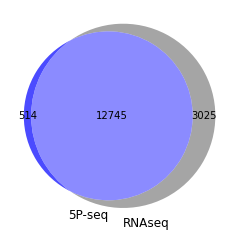

Total TSRs in protein-coding genes (multiple TSS per gene possible): 13259
Protein-coding genes expressed (multiple transcripts per gene possible): 15770
Genes for which both TRS and RNAseq evidence for expression:  12745 (96.1%)
Fraction of TRS: TRS only and shared with RNAseq evidence for expression:  3.9% and 96.1%
Fraction of expressed genes: expressed only and shared with TRS evidence:  19.2% and 80.8%


In [6]:
both=tss_rnaseq_protein_intersect.shape[0] 
tss_only = tss_protein.Nearest_Ensembl.dropna().unique().shape[0] - both
rnaseq_only = expressed_protein.ens_gene.dropna().unique().shape[0] - both

c=venn2(subsets = (tss_only, rnaseq_only, both),alpha=0.7,set_colors=('blue','gray'),
        set_labels = ('5P-seq', 'RNAseq'))
plt.savefig('figureS5.pdf', bbox_inches="tight")
plt.show()
plt.close()

print(f'Total TSRs in protein-coding genes (multiple TSS per gene possible): {tss_protein.Nearest_Ensembl.dropna().unique().shape[0]}')
print(f'Protein-coding genes expressed (multiple transcripts per gene possible): {expressed_protein.ens_gene.dropna().unique().shape[0]}')
print(f'Genes for which both TRS and RNAseq evidence for expression:  {both} ({round(both/tss_protein.Nearest_Ensembl.dropna().unique().shape[0]*100,1)}%)')
print(f'Fraction of TRS: TRS only and shared with RNAseq evidence for expression:  {round(tss_only/tss_protein.Nearest_Ensembl.dropna().unique().shape[0]*100,1)}% and {round(both/tss_protein.Nearest_Ensembl.dropna().unique().shape[0]*100,1)}%')
print(f'Fraction of expressed genes: expressed only and shared with TRS evidence:  {round(rnaseq_only/expressed_protein.ens_gene.dropna().unique().shape[0]*100,1)}% and {round(both/expressed_protein.ens_gene.dropna().unique().shape[0]*100,1)}%')
